In [9]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [10]:
# Load the dataset
df = pd.read_csv('used_cars.csv')

In [ ]:
# Display basic information and the first few rows
print("Shape of the dataset:")
print(df.shape)


Shape of the dataset:
(4009, 12)


In [13]:
print("\nFirst 5 rows of the dataset:")
print(df.head())



First 5 rows of the dataset:
      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black  

In [14]:
print("\nInformation about the dataset:")
df.info()



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [24]:
# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


In [25]:
# Get the list of categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print(f"\nCategorical columns: {list(categorical_cols)}")

# Print unique values for each categorical column (first 10 if too many)
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"\nUnique values in '{col}':")
    if len(unique_values) > 10:
        print(unique_values[:10].tolist() + ['...'])
    else:
        print(unique_values)


Categorical columns: ['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']

Unique values in 'brand':
['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW', 'Tesla', 'Land', 'Aston', '...']

Unique values in 'model':
['Utility Police Interceptor Base', 'Palisade SEL', 'RX 350 RX 350', 'Q50 Hybrid Sport', 'Q3 45 S line Premium Plus', 'ILX 2.4L', 'S3 2.0T Premium Plus', '740 iL', 'RC 350 F Sport', 'Model X Long Range Plus', '...']

Unique values in 'milage':
['51,000 mi.', '34,742 mi.', '22,372 mi.', '88,900 mi.', '9,835 mi.', '136,397 mi.', '84,000 mi.', '242,000 mi.', '23,436 mi.', '34,000 mi.', '...']

Unique values in 'fuel_type':
['E85 Flex Fuel' 'Gasoline' 'Hybrid' nan 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']

Unique values in 'engine':
['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability', '3.8L V6 24V GDI DOHC', '3.5 Liter DOHC', '354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid', '2.0L

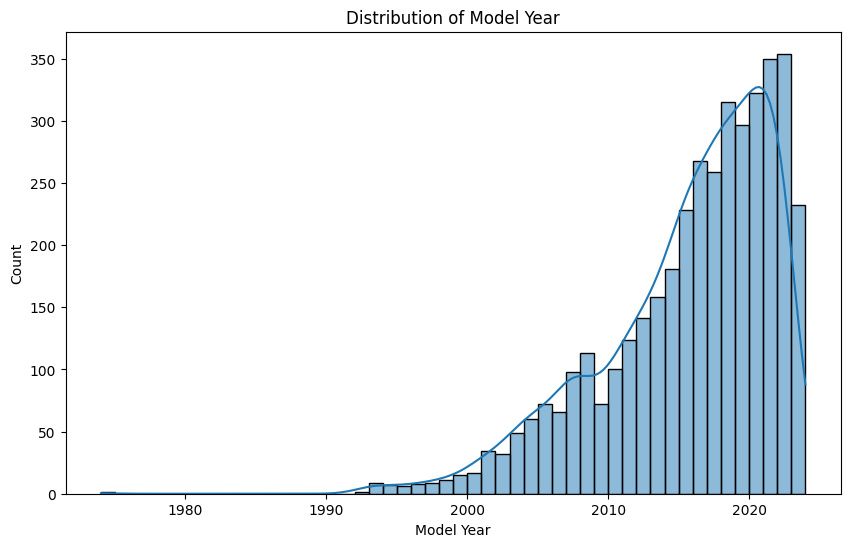

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features (model_year)
plt.figure(figsize=(10, 6))
sns.histplot(df['model_year'], kde=True)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

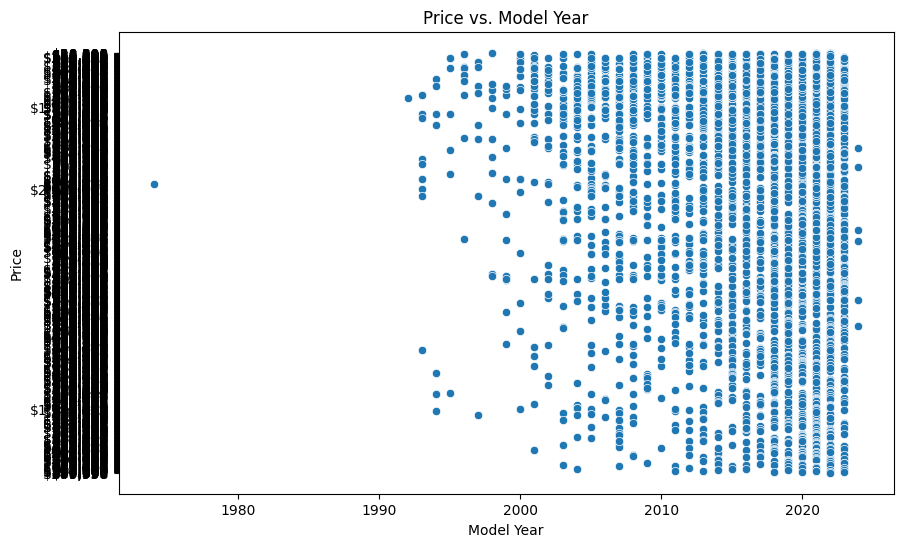

In [27]:
# Visualize the relationship between model_year and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='model_year', y='price')
plt.title('Price vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

In [30]:
# Handle missing values
df.dropna(inplace=True)

# Clean 'milage' and 'price' columns and convert to numeric
df['milage'] = df['milage'].astype(str).str.replace('[^\\d]', '', regex=True).astype(int)
df['price'] = df['price'].astype(str).str.replace('[^\\d]', '', regex=True).astype(int)

# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preparation complete. Data split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data preparation complete. Data split into training and testing sets.
Shape of X_train: (2615, 11)
Shape of X_test: (654, 11)
Shape of y_train: (2615,)
Shape of y_test: (654,)


In [31]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the full pipeline including preprocessing and the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [32]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 15435.287125382265
Mean Squared Error (MSE): 13677104959.026886
R-squared (R2): 0.0660133331446715


In [33]:
import pickle

# Define the filename for your pickle file
filename = 'used_car_price_model.pkl'

# Open the file in write-binary mode and save the model
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved successfully to {filename}")

Model saved successfully to used_car_price_model.pkl
